In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import copy
import time

import sys
sys.path.append('../../')

from data.processing import get_data

import models
import random

from main.seir.fitting import single_fitting_cycle
from main.seir.forecast import get_forecast, forecast_all_trials, create_all_trials_csv, create_decile_csv_new
from main.seir.sensitivity import calculate_sensitivity_and_plot
import main.seir.uncertainty as uncertainty_module
from utils.generic.create_report import save_dict_and_create_report_simple
from utils.generic.config import read_config
from utils.generic.enums import Columns
from utils.fitting.loss import Loss_Calculator
from utils.generic.logging import log_wandb
from viz import plot_forecast, plot_top_k_trials, plot_ptiles

import yaml

In [3]:
predictions_dict = {}

In [9]:
config_filename = 'undetected_simulated.yaml'
config = read_config(config_filename)

In [10]:
output_folder = '../../misc/reports/{}'.format(datetime.datetime.now().strftime("%Y_%m%d_%H%M%S"))

## Perform M1 and M2 fits

Performing m1 fit ..
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 36                  | 37                  | 38                  | 39                  | 40                  |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-08-13 00:00:00 | 2020-08-14 00:00:00 | 2020-08-15 00:00:00 | 2020-08-16 00:00:00 | 2020-08-17 00:00:00 |
| state       | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         |
| district    | Mumbai              | Mumbai              | Mumbai              | Mumbai              | Mumbai              |
| s           | 9256356.0           | 9238431.0           | 9220416.0           | 9202314.0           | 9184128.0           |
| e           | 87015.0             | 87537.0         

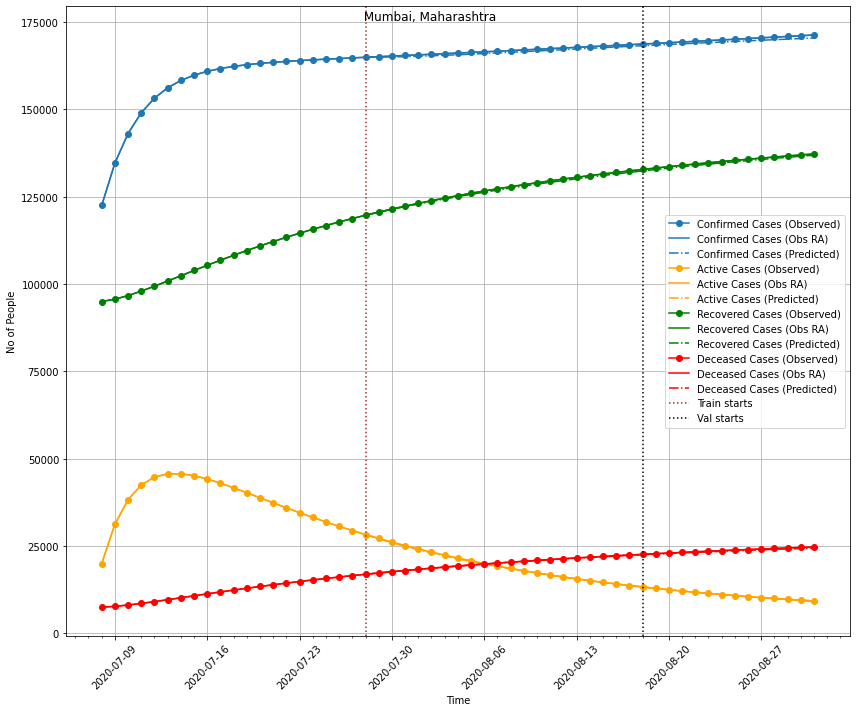

In [11]:
best_params = []
train_losses = []
val_losses = []
for i in range(1):
    predictions_dict['m1'] = single_fitting_cycle(**copy.deepcopy(config['fitting'])) 
    predictions_dict['fitting_date'] = datetime.datetime.now().strftime("%Y-%m-%d")
    best_params.append(predictions_dict['m1']['best_params'])
    train_losses.append(predictions_dict['m1']['df_loss']['train'])
    val_losses.append(predictions_dict['m1']['df_loss']['val'])

In [12]:
import pandas as pd

df = pd.DataFrame(best_params)
df

,E_hosp_ratio,I_D_hosp_ratio,I_U_hosp_ratio,T_inc,T_inf_D,T_inf_U,T_recov_fatal,T_recov_severe,beta,d
0,2.637863,0.002175,2.023511,5.370851,5.997462,4.401389,21.659104,22.67459,0.201032,0.018374


In [13]:
df2 = pd.DataFrame(train_losses)
df2 = df2.add_prefix('trainloss_')
df2 = df2.set_index(df.index)

df3 = pd.DataFrame(val_losses)
df3 = df3.add_prefix('valloss_')
df3 = df3.set_index(df.index)

df2

,trainloss_total,trainloss_active,trainloss_recovered,trainloss_deceased
0,0.250574,0.54175,0.240239,0.164118


In [14]:
df_final = df.join(df2)
df_final = df_final.join(df3)

In [15]:
df_final.to_csv('../../misc/reports/recovered_params3.csv')